In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import pickle

In [12]:
from urllib.parse import urlparse

def extract_features(Domain):
    features = {}
    parsed = urlparse(Domain)
    domain = parsed.netloc
    path = parsed.path

    # 1. URL_Length
    features['URL_Length'] = len(Domain)

    # 2. having_At_Symbol
    features['having_At'] = 1 if '@' in Domain else 0

    # 3. Prefix_Suffix
    features['Prefix/Suffix'] = 1 if '-' in Domain else 0

    # 4. Use_of_HTTP
    features['https_Domain'] = 1 if parsed.scheme == 'http' else 0

    # 5. TinyURL/Shorteners
    shorteners = ['bit.ly', 'goo.gl', 'tinyurl.com', 'ow.ly', 't.co', 'bit.do', 'shorte.st', 'adf.ly', 'is.gd', 'buff.ly']
    features['TinyURL'] = 1 if any(short in Domain for short in shorteners) else 0

    # 6. URL_Depth
    features['URL_Depth'] = path.count('/')

    # 7. Redirection
    features['Redirection'] = 1 if '//' in path else 0

    return features


In [2]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/DataSets/URL_Data.csv')
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [13]:
# Extract features for each URL
feature_list = ['URL_Length', 'having_At', 'Prefix/Suffix', 'https_Domain', 'TinyURL', 'URL_Depth', 'Redirection']

df_features = df['Domain'].apply(extract_features).apply(pd.Series)

In [14]:
df_features.head()

,URL_Length,having_At,Prefix/Suffix,https_Domain,TinyURL,URL_Depth,Redirection
0,16,0,0,0,0,0,0
1,9,0,0,0,0,0,0
2,12,0,0,0,0,0,0
3,15,0,0,0,0,0,0
4,13,0,0,0,0,0,0


In [16]:
# Combine features with labels
df_combined = pd.concat([df_features, df['Label']], axis=1)

In [17]:
df_combined.head()

,URL_Length,having_At,Prefix/Suffix,https_Domain,TinyURL,URL_Depth,Redirection,Label
0,16,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0
2,12,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0


In [19]:
# Split data
X = df_combined[feature_list]
y = df_combined['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
# Train MLP
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

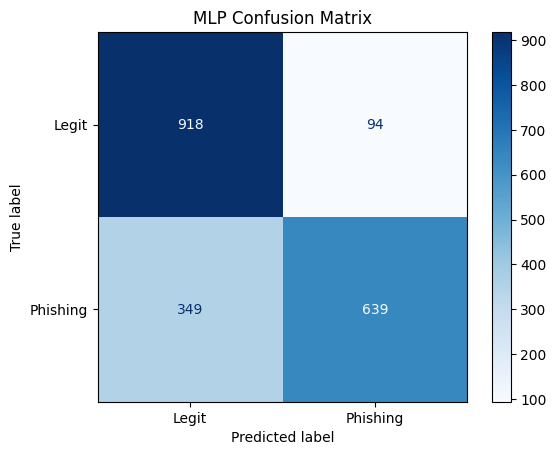

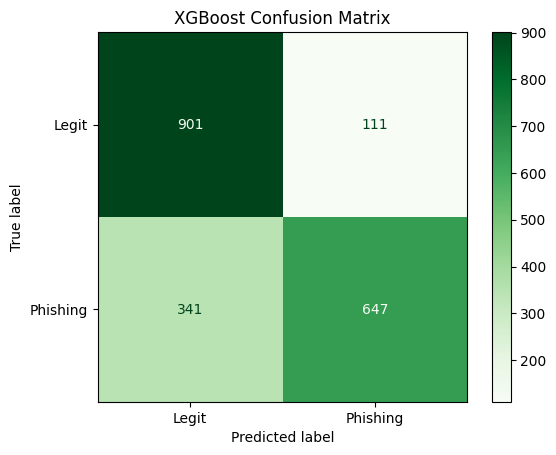

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
mlp_preds = mlp_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Confusion matrix for MLP
cm_mlp = confusion_matrix(y_test, mlp_preds)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=["Legit", "Phishing"])
disp_mlp.plot(cmap="Blues")
plt.title("MLP Confusion Matrix")
plt.show()

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, xgb_preds)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["Legit", "Phishing"])
disp_xgb.plot(cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.show()

In [26]:
#saving
pickle.dump(xgb_model, open("XGBoostClassifier.pickle.dat", "wb"))

In [29]:
#Load
xgb_loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
xgb_loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
pickle.dump(mlp_model, open("MLPClassifier.pickle.dat", "wb"))

In [31]:
mlp_loaded_model = pickle.load(open("MLPClassifier.pickle.dat", "rb"))
mlp_loaded_model

MLPClassifier()